In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')

In [4]:
df.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [5]:
df.sort_values('t_dat')
df.tail(5)

,t_dat,customer_id,article_id,price,sales_channel_id
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2


In [12]:
def query_based_on_date(df, start_date='2020-06-22', end_date='2020-09-22'):
    x = df[(df['t_dat']>start_date) & (df['t_dat']<=end_date)]
    return x



In [14]:
start_date = '2020-01-01'
x = query_based_on_date(df, start_date)
train_x = query_based_on_date(x, start_date, '2020-07-22')
test_x = query_based_on_date(x, '2020-07-23')


In [15]:
print(train_x['t_dat'])
print(test_x['t_dat'])

20820952    2020-01-02
20820953    2020-01-02
20820954    2020-01-02
20820955    2020-01-02
20820956    2020-01-02
               ...    
29361343    2020-07-22
29361344    2020-07-22
29361345    2020-07-22
29361346    2020-07-22
29361347    2020-07-22
Name: t_dat, Length: 8540396, dtype: object
29406324    2020-07-24
29406325    2020-07-24
29406326    2020-07-24
29406327    2020-07-24
29406328    2020-07-24
               ...    
31788319    2020-09-22
31788320    2020-09-22
31788321    2020-09-22
31788322    2020-09-22
31788323    2020-09-22
Name: t_dat, Length: 2382000, dtype: object


In [16]:
train_x.shape, test_x.shape

((8540396, 5), (2382000, 5))

In [23]:
train_customers = set(train_x['customer_id'].unique().tolist())
test_customers = set(test_x['customer_id'].unique().tolist())
print(len(train_customers), len(test_customers))
print(type(train_customers), type(test_customers))

769650 400458
<class 'set'> <class 'set'>


In [24]:
train_test_overlap = train_customers.intersection(test_customers)
print(len(train_test_overlap) / len(test_customers))

0.7715690534338183


In [25]:
customers_to_remove = test_customers - train_test_overlap 
print(len(customers_to_remove))
test_customers-=customers_to_remove
print(len(test_customers))

91477
308981


In [27]:
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)==True]

In [28]:
test_x = filter_rows_by_values(test_x,'customer_id',train_test_overlap)

In [29]:
print(test_x.shape)

(1993171, 5)


In [30]:
test_x_temp = test_x.sample(frac = 0.5)
# Creating dataframe with
# rest of the 50% values
val_x = test_x.drop(test_x_temp.index)

In [31]:
print(val_x.shape)
print(test_x_temp.shape)

(996585, 5)
(996586, 5)


In [32]:
test_x = test_x_temp
print(test_x.shape)

(996586, 5)


In [47]:
### training dataset : train_x
### testing dataset : test_x
### validation dataset : val_x

In [48]:
########## VISUALIZATIONS ###########

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
sns.set(rc = {'figure.figsize':(15,8)})

In [36]:
### Visualization for original dataset.
y_original = df['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y_original["Period"] = pd.to_datetime(y_original["date"])
y_original = y_original.set_index("Period")
y_original["year"] = y_original.index.year
y_original["Month"] = y_original.index.month_name()
y_original["month_number"] = y_original.index.month
y_original = y_original.sort_values('month_number')
y_original.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-01-01,2020-01-01,12760,2020,January,1
2020-01-29,2020-01-29,36833,2020,January,1
2019-01-09,2019-01-09,53309,2019,January,1
2020-01-09,2020-01-09,36746,2020,January,1
2020-01-23,2020-01-23,36257,2020,January,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

[Text(0.5, 1.0, 'Purchases over the years 2018-2020')]

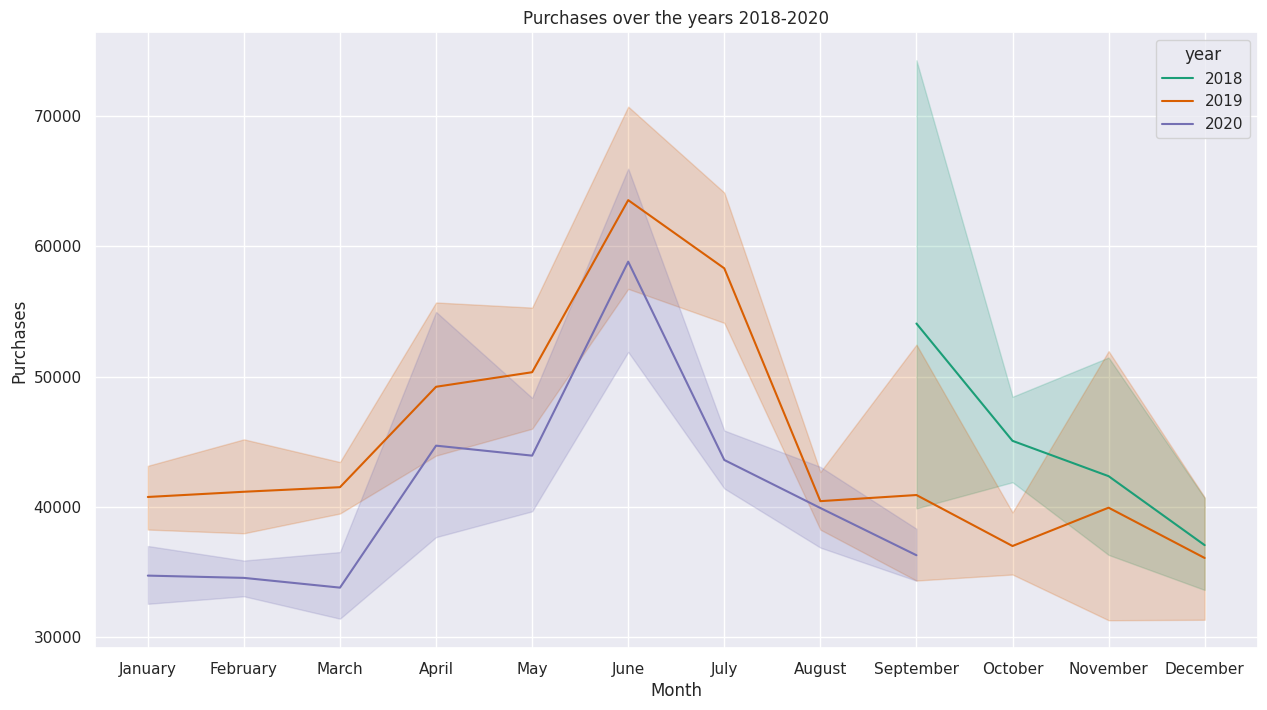

In [ ]:
sns.lineplot(x="Month", y="Purchases", data=y_original, hue="year", palette="Dark2").set(title='Purchases over the years 2018-2020')

[Text(0.5, 1.0, 'Purchases over the years 2018-2020')]

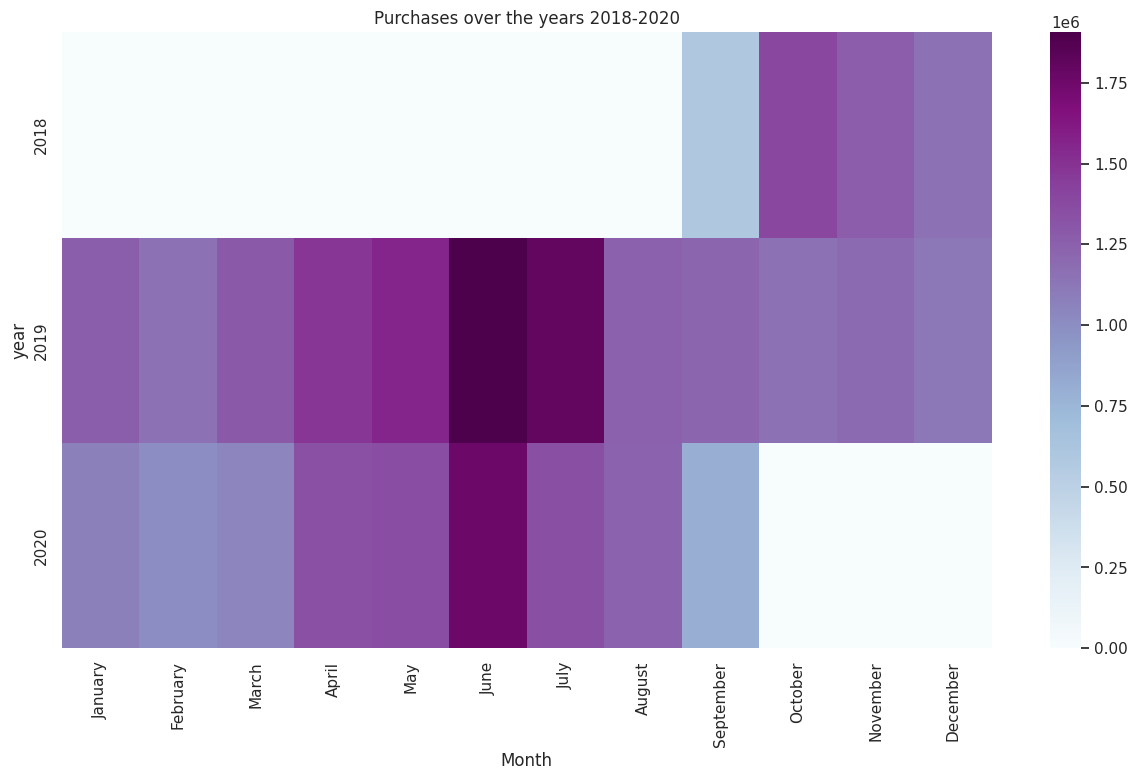

In [39]:
pt2 = y_original.pivot_table(index="year",columns="Month",values="Purchases", aggfunc="sum").fillna(0)
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

pt2.columns = pd.CategoricalIndex(pt2.columns,categories=months)
pt2.sort_index(axis=1,inplace=True)
sns.heatmap(pt2, cmap="BuPu").set(title='Purchases over the years 2018-2020')

In [40]:
y = x['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y["Period"] = pd.to_datetime(y["date"])
y = y.set_index("Period")
y["year"] = y.index.year
y["Month"] = y.index.month_name()
y["month_number"] = y.index.month
y.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-04-11,2020-04-11,162799,2020,April,4
2020-06-17,2020-06-17,110981,2020,June,6
2020-06-24,2020-06-24,98790,2020,June,6
2020-06-25,2020-06-25,88684,2020,June,6
2020-06-18,2020-06-18,84563,2020,June,6


[Text(0.5, 1.0, 'Bar graph for Purchases from January to September (2020)')]

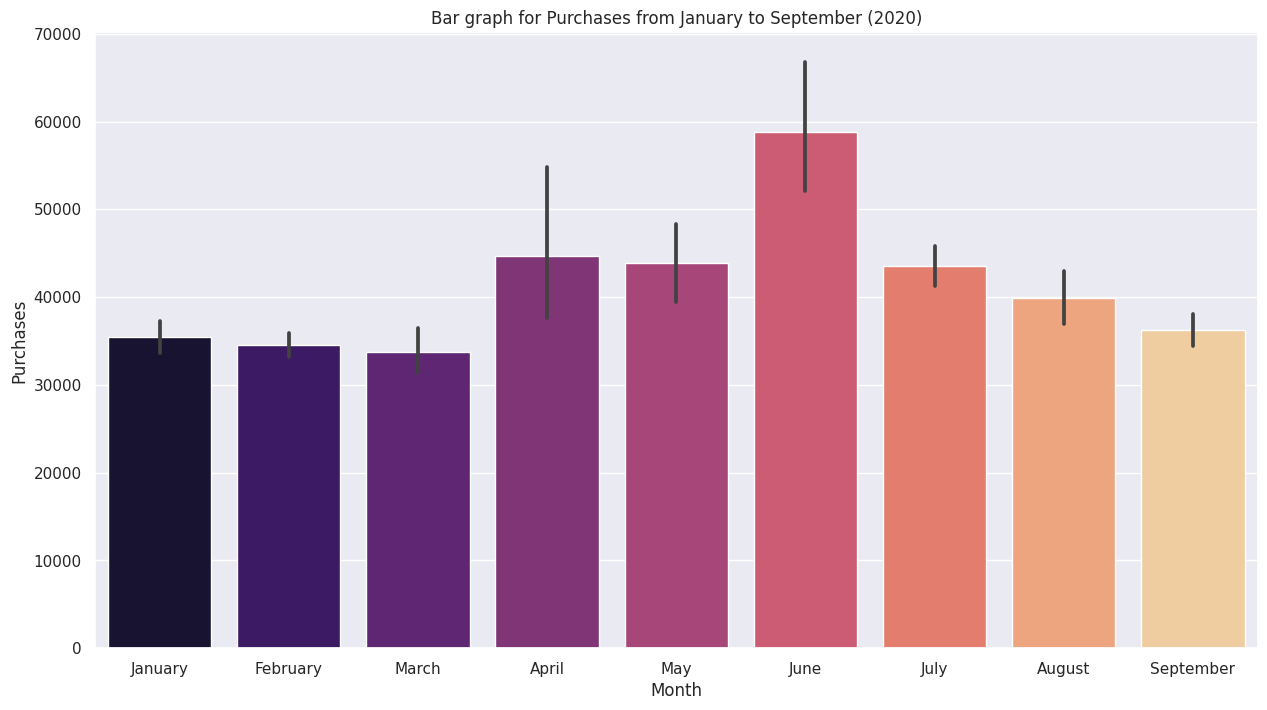

In [42]:
### barplot for sampled dataset (9 months)
y = y.sort_values('month_number')
sns.barplot(x = 'Month', y='Purchases', data = y,  palette = 'magma').set(title='Bar graph for Purchases from January to September (2020)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

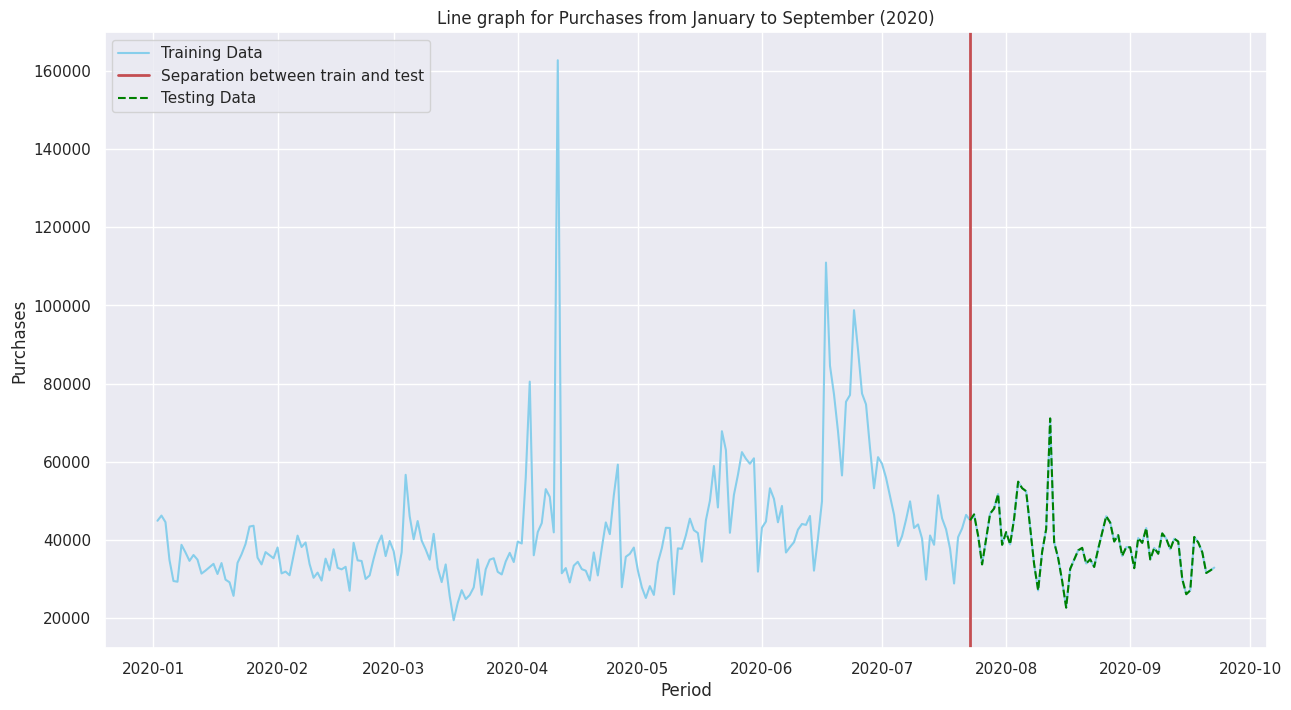

In [43]:
sns.lineplot(x="Period", y="Purchases", data=y, color='skyblue', label="Training Data") # plot normal time series plot
# plot subset on top of the normal time series
plt.axvline(pd.to_datetime('2020-07-23'), color='r', lw=2, label="Separation between train and test")

g=sns.lineplot(x="Period",y="Purchases",data=y[(y['date'] >= '2020-07-23') & (y['date'] <= '2020-09-22')], linestyle="dashed", color='green', label="Testing Data").set(title='Line graph for Purchases from January to September (2020)')

In [45]:
df_articles = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv')
df_customers = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv')

In [46]:
sample_x = query_based_on_date(x, '2020-09-18')

In [47]:
df_test = pd.merge(df_articles, sample_x, on=['article_id'], how='left') 
df_test_merged = pd.merge(df_test, df_customers, on=['customer_id'], how='left')  

In [48]:
y_product_group = df_test_merged['product_group_name'].value_counts().rename_axis('Product group').reset_index(name='Purchases').head(5)
y_product_group_list = list(y_product_group['Product group'])
df_prod_filtered = filter_rows_by_values(df_test_merged,'product_group_name',y_product_group_list)

Text(0, 0.5, 'Price')

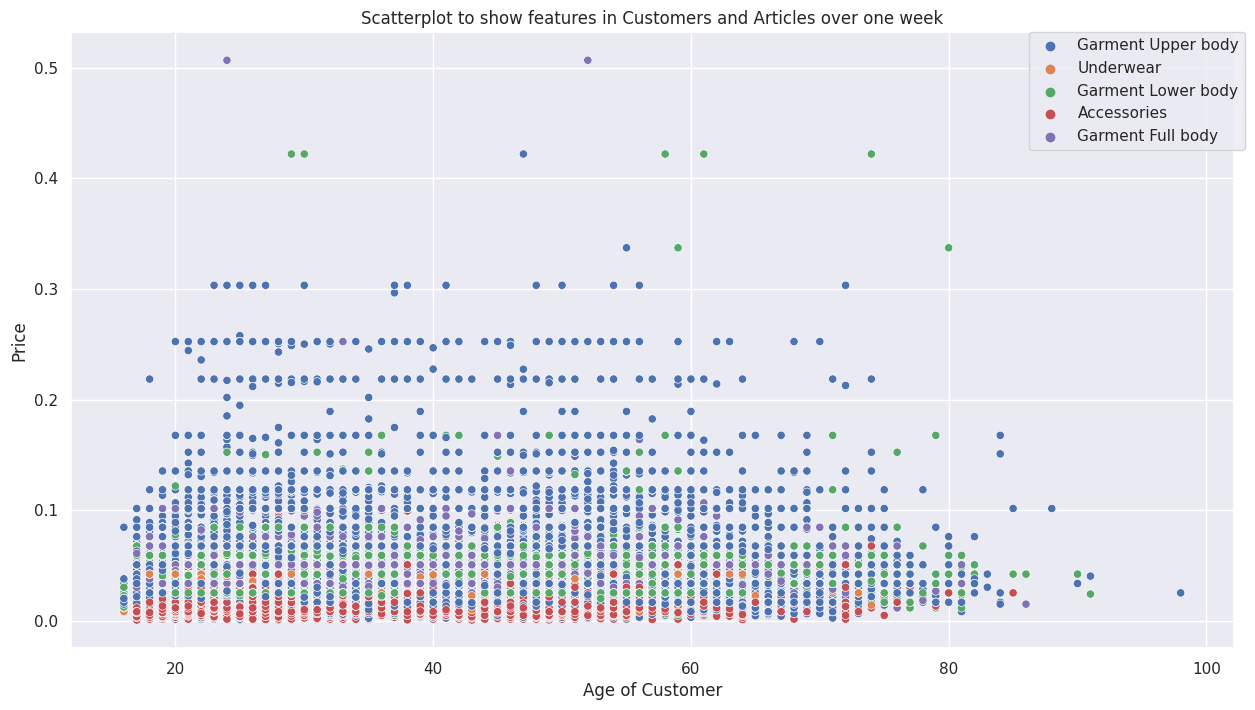

In [49]:
## Scatterplot
sns.scatterplot(data = df_prod_filtered, x = "age", y = "price", hue = "product_group_name")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Scatterplot to show features in Customers and Articles over one week")
plt.xlabel("Age of Customer")
plt.ylabel("Price")